In [134]:
#Importation des librairies

import pandas as pd 
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.available
plt.style.use('seaborn-pastel')
from matplotlib.pyplot import figure
sns.set(style="darkgrid")

import plotly.graph_objects as go 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

import warnings
warnings.filterwarnings('ignore')



## Exploration du DataFrame

In [8]:
#Lecture du .csv 
df = pd.read_csv(r"C:\Users\pierr\Downloads\archive (7)\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
#Infos du DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [21]:
#Describe
round(df.describe(),2)

,year,score,votes,budget,gross,runtime
count,7668.00,7665.00,7665.00,5.497000e+03,7.479000e+03,7664.00
mean,2000.41,6.39,88108.50,3.558988e+07,7.850054e+07,107.26
std,11.15,0.97,163323.76,4.145730e+07,1.657251e+08,18.58
min,1980.00,1.90,7.00,3.000000e+03,3.090000e+02,55.00
25%,1991.00,5.80,9100.00,1.000000e+07,4.532056e+06,95.00
50%,2000.00,6.50,33000.00,2.050000e+07,2.020576e+07,104.00
75%,2010.00,7.10,93000.00,4.500000e+07,7.601669e+07,116.00
max,2020.00,9.30,2400000.00,3.560000e+08,2.847246e+09,366.00


In [95]:
#Doublons
df.duplicated().sum()

0

In [24]:
#Valeurs manquantes
percent_missing = df.isnull().sum() * 100 / len(df)
missing_va = df.isnull().sum()
missing_value_df = pd.DataFrame({'missing' : missing_va,
                                'percent_missing': percent_missing})
display(missing_value_df)


,missing,percent_missing
name,0,0.000000
rating,77,1.004173
genre,0,0.000000
year,0,0.000000
released,2,0.026082
score,3,0.039124
votes,3,0.039124
director,0,0.000000
writer,3,0.039124
star,1,0.013041


In [23]:
#Nombre de valeurs uniques
df.nunique()


name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

Après observation des données, je conclus que certaines variables devraient être de type INT et pas Float ; et que le DF présente un important nombre de NAs. Afin de faciliter l'analyse, je décide de simplement supprimer les NAs. 
Par ailleurs, j'aimerais transformer la colonne "released" pour en faire un type DATETIME.

## Nettoyage des données


In [148]:
#Suppression des valeurs aberrantes de la colonne "gross"
df_clean['gross'][df_clean['gross'] < 0] = df_clean['gross'][df_clean['gross'] < 0]*-1



Series([], Name: gross, dtype: float64)

In [146]:
#Suppression des NAs
df_clean = df.dropna()
print(df_clean.isna().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [40]:
#Conversion des données
df_clean[['budget','gross','runtime','votes']] = df_clean[['budget','gross','runtime','votes']].astype(int)

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   int32  
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int32  
 12  gross     5421 non-null   int32  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(9)
memory usage: 592.9+ KB


In [91]:
#Créer une colonne "date"

#Importation des librairies nécessaires
import re
from datetime import datetime

#Extraction des caractères nécessaires
df_clean['date'] = df_clean['released'].str.replace(",","")[:-1].str.extract(r"^(.*?)\(")

#Conversion au format Datetime avec un format de date FR
df_clean['date'] = pd.to_datetime(df_clean['date']).dt.strftime('%d-%m-%Y')

df_clean['date']

0       13-06-1980
1       02-07-1980
2       20-06-1980
3       02-07-1980
4       25-07-1980
           ...    
7648    17-01-2020
7649    14-02-2020
7650    17-01-2020
7651    21-02-2020
7652           NaN
Name: date, Length: 5421, dtype: object

In [98]:
#Suppression des variables redondantes
df_clean = df_clean.drop(['year','released'], axis = 1)

#Tri par ordre alphabétique du titre du film
df_clean.sort_values(by = 'name')

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date
1099,*batteries not included,PG,Comedy,6.7,32000,Matthew Robbins,Mick Garris,Hume Cronyn,United States,25000000,65088797,Universal Pictures,106,18-12-1987
6906,10 Cloverfield Lane,PG-13,Action,7.2,300000,Dan Trachtenberg,Josh Campbell,John Goodman,United States,15000000,110216998,Paramount Pictures,103,11-03-2016
3452,10 Things I Hate About You,PG-13,Comedy,7.3,309000,Gil Junger,Karen McCullah,Heath Ledger,United States,30000000,53478579,Touchstone Pictures,97,31-03-1999
393,10 to Midnight,R,Crime,6.3,7200,J. Lee Thompson,William Roberts,Charles Bronson,United States,4520000,7175592,Cannon Films,101,11-03-1983
5344,"10,000 BC",PG-13,Action,5.1,127000,Roland Emmerich,Roland Emmerich,Camilla Belle,United States,105000000,269784201,Warner Bros.,109,07-03-2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,eXistenZ,R,Horror,6.8,96000,David Cronenberg,David Cronenberg,Jude Law,United Kingdom,15000000,2856712,Dimension Films,97,23-04-1999
4083,xXx,PG-13,Action,5.9,175000,Rob Cohen,Rich Wilkes,Vin Diesel,United States,70000000,277448382,Revolution Studios,124,09-08-2002
7112,xXx: Return of Xander Cage,PG-13,Action,5.2,88000,D.J. Caruso,Rich Wilkes,Vin Diesel,China,85000000,346118277,Paramount Pictures,107,20-01-2017
4761,xXx: State of the Union,PG-13,Action,4.5,68000,Lee Tamahori,Rich Wilkes,Ice Cube,United States,113000000,71022693,Columbia Pictures,101,29-04-2005


## Analyse des données

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000
AxesSubplot(0.125,0.11;0.62x0.77)


year     year       1.000000
score    score      1.000000
gross    gross      1.000000
budget   budget     1.000000
votes    votes      1.000000
runtime  runtime    1.000000
gross    budget     0.740247
budget   gross      0.740247
gross    votes      0.614751
votes    gross      0.614751
score    votes      0.474256
votes    score      0.474256
budget   votes      0.439675
votes    budget     0.439675
runtime  score      0.414068
score    runtime    0.414068
runtime  votes      0.352303
votes    runtime    0.352303
year     budget     0.327722
budget   year       0.327722
         runtime    0.318695
runtime  budget     0.318695
gross    runtime    0.275796
runtime  gross      0.275796
gross    year       0.274321
year     gross      0.274321
gross    score      0.222556
score    gross      0.222556
votes    year       0.206021
year     votes      0.206021
         runtime    0.075077
runtime  year       0.075077
budget   score      0.072001
score    budget     0.072001
year     score

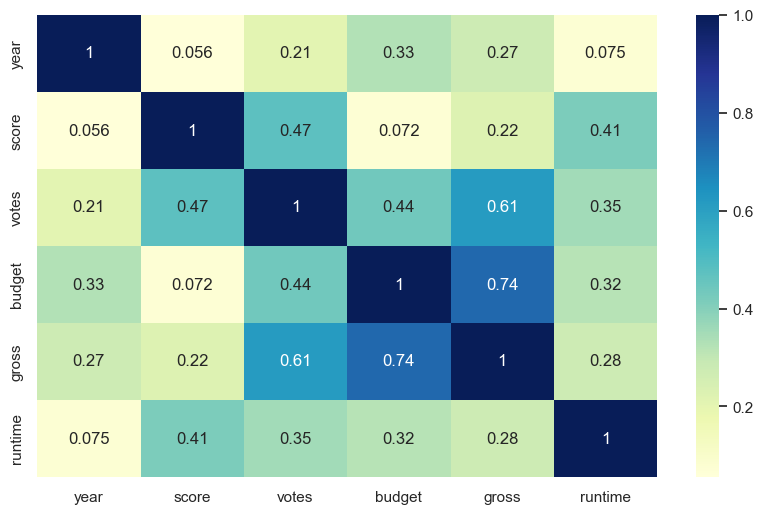

In [172]:
#Matrice de corrélation

mat_corr = df_clean.corr(method="pearson")
print(mat_corr)
print(sns.heatmap(df_clean.corr(), annot = True, cmap = 'YlGnBu'))
mat_corr.unstack().sort_values(ascending = False)


On remarque que le budget et le score des films sont fortement décorrelés. 
En revanche, il existe une forte corrélation positive entre le budget du film et les revenus qu'il engrange. 
Le revenu du film et le nombre de votes qu'il suscite sont également corrélés positivement, ce qui peut s'expliquer par l'incidence identique sur ces deux variables de la popularité d'un film. 

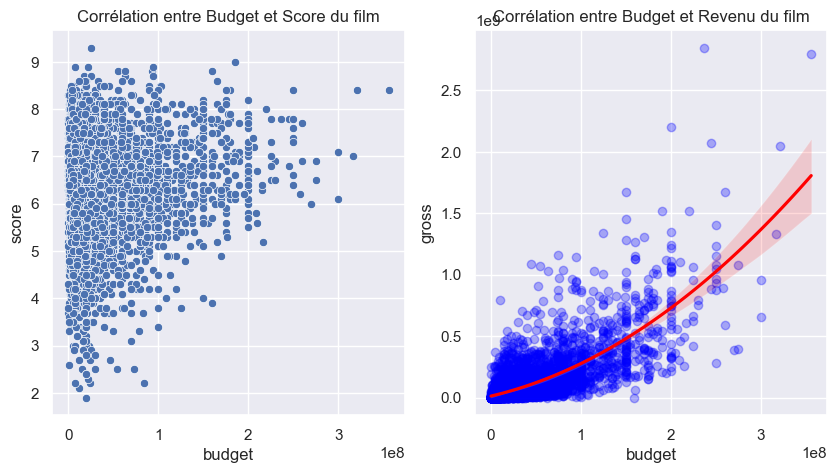

In [168]:
#Création de graphiques illustrant ces corrélations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.scatterplot(x = 'budget', y = 'score', data = df_clean, palette = 'YlGnBu', ax=ax1)
ax1.title.set_text("Corrélation entre Budget et Score du film")

sns.regplot(x = 'budget', y = 'gross', data = df_clean, scatter_kws = {"color":"blue", "alpha":0.3}, line_kws = {"color":"red"}, order = 2, ax=ax2)
ax2.title.set_text("Corrélation entre Budget et Revenu du film")
